In [1]:
import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['figure.dpi'] = 300

In [2]:
JOB_DATA_FILE='jobs-2019-11-11.txt'

In [3]:
df = pd.read_csv(JOB_DATA_FILE, sep='|')

In [4]:
df.head()

,JobID,Account,Submit,Start,End,NNodes,State,QOS,Partition
0,1301523,co_rosalind,2017-04-25T11:24:01,Unknown,Unknown,1,PENDING,savio_lowprio,savio_bigmem
1,1558831,fc_zingiber,2017-07-18T12:52:41,Unknown,Unknown,1,PENDING,savio_normal,savio
2,1558836,fc_zingiber,2017-07-18T12:54:45,Unknown,Unknown,1,PENDING,savio_normal,savio
3,1560071,fc_zingiber,2017-07-18T21:30:01,Unknown,Unknown,1,PENDING,savio_normal,savio
4,3058499,fc_drought,2018-06-01T16:41:27,Unknown,Unknown,1,PENDING,savio_normal,savio2


In [5]:
df = df[df.Start != 'Unknown']
df = df[df.End   != 'Unknown']
df = df[df.JobID.str[-6] != '.batch']

In [6]:
df.head()


,JobID,Account,Submit,Start,End,NNodes,State,QOS,Partition
18,4418950,fc_surfwill,2019-06-06T08:40:53,2019-12-06T12:38:40,2019-12-06T12:49:31,1,OUT_OF_MEMORY,savio_normal,savio
19,4418950.batch,fc_surfwill,2019-12-06T12:38:40,2019-12-06T12:38:40,2019-12-06T12:49:31,1,OUT_OF_MEMORY,NaN,NaN
20,4419029,fc_surfwill,2019-06-06T08:48:42,2019-12-06T12:38:40,2019-12-06T12:48:27,1,OUT_OF_MEMORY,savio_normal,savio
21,4419029.batch,fc_surfwill,2019-12-06T12:38:40,2019-12-06T12:38:40,2019-12-06T12:48:27,1,OUT_OF_MEMORY,NaN,NaN
32,5151447,co_rosalind,2019-10-29T11:44:12,2019-10-29T11:44:13,2019-11-22T10:44:39,1,TIMEOUT,rosalind_htc2_normal,savio2_htc


In [7]:
df['Start']  = pd.to_datetime(df.Start)
df['End']    = pd.to_datetime(df.End)
df['Submit'] = pd.to_datetime(df.Submit)
df['Wait']   = df.Start - df.Submit
df['Wait_min']   = df['Wait'] / np.timedelta64(1,'m')
df['Wait_hours'] = df['Wait'] / np.timedelta64(1,'h')
df.index = df.Submit
df = df.sort_index()


In [8]:
df.head()

,JobID,Account,Submit,Start,End,NNodes,State,QOS,Partition,Wait,Wait_min,Wait_hours
Submit,,,,,,,,,,,,
2019-06-06 08:40:53,4418950,fc_surfwill,2019-06-06 08:40:53,2019-12-06 12:38:40,2019-12-06 12:49:31,1,OUT_OF_MEMORY,savio_normal,savio,183 days 03:57:47,263757.783333,4395.963056
2019-06-06 08:48:42,4419029,fc_surfwill,2019-06-06 08:48:42,2019-12-06 12:38:40,2019-12-06 12:48:27,1,OUT_OF_MEMORY,savio_normal,savio,183 days 03:49:58,263749.966667,4395.832778
2019-10-29 11:44:12,5151447,co_rosalind,2019-10-29 11:44:12,2019-10-29 11:44:13,2019-11-22 10:44:39,1,TIMEOUT,rosalind_htc2_normal,savio2_htc,0 days 00:00:01,0.016667,0.000278
2019-10-29 11:44:13,5151447.0,co_rosalind,2019-10-29 11:44:13,2019-10-29 11:44:13,2019-11-22 10:44:42,1,CANCELLED,NaN,NaN,0 days 00:00:00,0.000000,0.000000
2019-10-29 11:44:13,5151447.batch,co_rosalind,2019-10-29 11:44:13,2019-10-29 11:44:13,2019-11-22 10:44:41,1,CANCELLED,NaN,NaN,0 days 00:00:00,0.000000,0.000000


In [11]:
#grouped = df.groupby('Partition')
grouped = ['foo', 'bar']

In [14]:
for group in grouped:
    #figure()
    #matplotlib.pyplot.hist(group[1].N)
    #mpl.pyplot.hist(group[1].Partition)
    #show()
    print( group )

foo
bar


In [15]:
df.head()

,JobID,Account,Submit,Start,End,NNodes,State,QOS,Partition,Wait,Wait_min,Wait_hours
Submit,,,,,,,,,,,,
2019-06-06 08:40:53,4418950,fc_surfwill,2019-06-06 08:40:53,2019-12-06 12:38:40,2019-12-06 12:49:31,1,OUT_OF_MEMORY,savio_normal,savio,183 days 03:57:47,263757.783333,4395.963056
2019-06-06 08:48:42,4419029,fc_surfwill,2019-06-06 08:48:42,2019-12-06 12:38:40,2019-12-06 12:48:27,1,OUT_OF_MEMORY,savio_normal,savio,183 days 03:49:58,263749.966667,4395.832778
2019-10-29 11:44:12,5151447,co_rosalind,2019-10-29 11:44:12,2019-10-29 11:44:13,2019-11-22 10:44:39,1,TIMEOUT,rosalind_htc2_normal,savio2_htc,0 days 00:00:01,0.016667,0.000278
2019-10-29 11:44:13,5151447.0,co_rosalind,2019-10-29 11:44:13,2019-10-29 11:44:13,2019-11-22 10:44:42,1,CANCELLED,NaN,NaN,0 days 00:00:00,0.000000,0.000000
2019-10-29 11:44:13,5151447.batch,co_rosalind,2019-10-29 11:44:13,2019-10-29 11:44:13,2019-11-22 10:44:41,1,CANCELLED,NaN,NaN,0 days 00:00:00,0.000000,0.000000


In [16]:
# select partition (tmp)
#df = df[ df['Partition'] == 'savio']
#df = df[ df['Partition'] == 'savio2']

In [17]:
range(1000)
df[ df['Partition'] == 'savio3'].head()

,JobID,Account,Submit,Start,End,NNodes,State,QOS,Partition,Wait,Wait_min,Wait_hours
Submit,,,,,,,,,,,,
2019-11-10 00:25:41,5182216,co_noneq,2019-11-10 00:25:41,2019-11-10 00:28:54,2019-11-11 00:29:19,2,TIMEOUT,savio_lowprio,savio3,00:03:13,3.216667,0.053611
2019-11-10 00:29:35,5182255,co_noneq,2019-11-10 00:29:35,2019-11-10 00:36:18,2019-11-11 00:36:19,2,TIMEOUT,savio_lowprio,savio3,00:06:43,6.716667,0.111944
2019-11-10 13:24:18,5183558,co_chemqmc,2019-11-10 13:24:18,2019-11-10 17:16:16,2019-11-11 09:12:13,1,COMPLETED,savio_lowprio,savio3,03:51:58,231.966667,3.866111
2019-11-10 13:24:18,5183559,co_chemqmc,2019-11-10 13:24:18,2019-11-10 17:29:01,2019-11-11 09:22:56,1,COMPLETED,savio_lowprio,savio3,04:04:43,244.716667,4.078611
2019-11-10 14:56:50,5183618,co_noneq,2019-11-10 14:56:50,2019-11-10 14:56:51,2019-11-12 11:42:02,2,CANCELLED by 42859,noneq_savio3_normal,savio3,00:00:01,0.016667,0.000278


(0, 100)

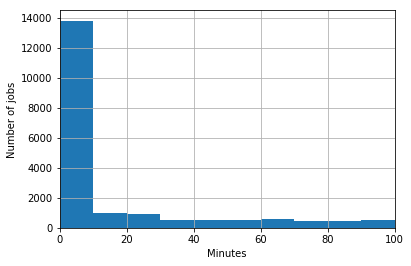

In [18]:
#https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
#figure, ax = plt.subplots(3,3) 
figure, ax = plt.subplots(1) 
#_, ax = plt.subplots()
#df['Wait_min'].hist(ax=ax,bins=[10* x for x in range(100)])
#df['Wait_min'].hist(ax=ax,bins=[ 20*x for x in range(100)])
#df['Wait_min'].hist(ax=ax,bins=[ 0,20,40,60,80,100])
#df['Wait_min'].hist(ax=ax,bins=[ 0,5,10,15,20])
df[ df['Partition'] == 'savio2']['Wait_min'].hist(ax=ax,bins=[10* x for x in range(100)])
#df['Wait_min'].hist(ax=ax,bins=5)
#df['Wait_min'].hist(ax=ax,bins=[5* x for x in range(100)],by=df['Partition'])
#df['Wait_min'].hist(bins=[5* x for x in range(100)],by=df['Partition'])
#ax.set_title('Queue wait time 2019-11-11 to 2019-12-11')
#ax.set_title( PRT )
ax.set_ylabel('Number of jobs')
ax.set_xlabel('Minutes')
ax.set_xlim([0,100])

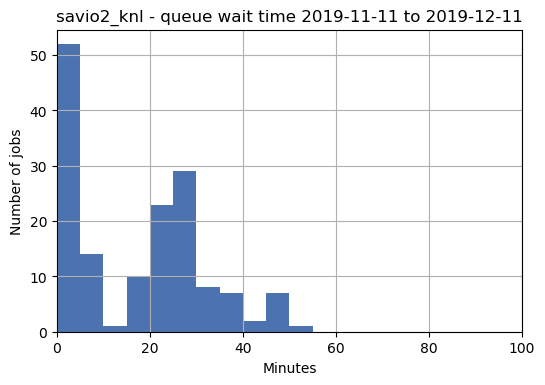

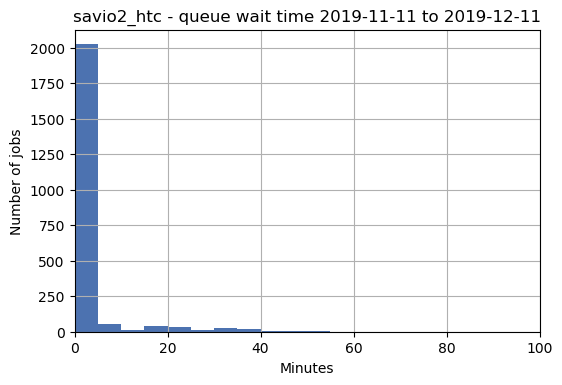

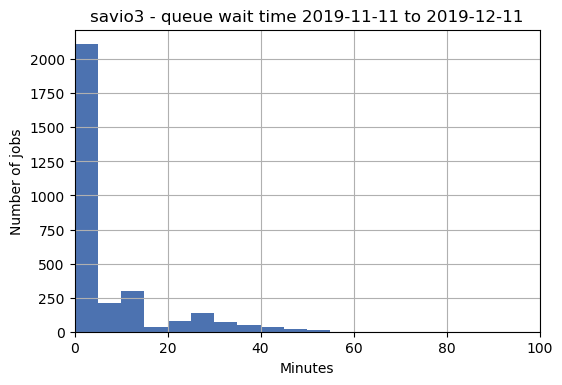

In [172]:
# this one is decent, albeit long list of graphs
# savio,savio2,savio2_1080ti,savio2_bigmem,savio2_gpu,savio2_htc,savio2_knl,savio3,savio3_2080ti,savio3_bigmem,savio3_gpu,savio3_xlmem,savio_bigmem

mpl.rcParams['figure.dpi'] = 100  # govern how big the figure is.  def maybe ~75

for PRT in ['savio2_knl', 'savio2_htc', 'savio3'] :
#for PRT in ['savio', 'savio2', 'savio2_knl', 'savio2_htc', 'savio3'] :
#for PRT in ["savio","savio_bigmem","savio2","savio2_1080ti","savio2_bigmem","savio2_gpu","savio2_htc","savio2_knl","savio3","savio3_2080ti","savio3_bigmem","savio3_gpu","savio3_xlmem"] :
    #print( "Queue: " + PRT )
    _, ax = plt.subplots()
    # the dataframe on left of .hist() is the series being plotted.  could have been a param for hist()
    #df[ df['Partition'] == PRT ]['Wait_min'].hist(ax=ax,bins=[5* x for x in range(100)])
    df[ df['Partition'] == PRT ]['Wait_min'].hist(ax=ax,bins=[5* x for x in range(12)])
    
    #df['Wait_min'].hist(ax=ax,bins=[5* x for x in range(100)])
    #plt.plot(df[ df['Partition'] == PRT ]['Wait_min'].values.tolist())
    #plt.plot(df[ df['Partition'] == PRT ]['Wait_min'].values.tolist(), label=PRT)
    
    
    #ax.set_title('Queue wait time 2019-11-11 to 2019-12-11')
    ax.set_title( PRT + ' - queue wait time 2019-11-11 to 2019-12-11' )
    ax.set_ylabel('Number of jobs')
    ax.set_xlabel('Minutes')
    ax.set_xlim([0,100])


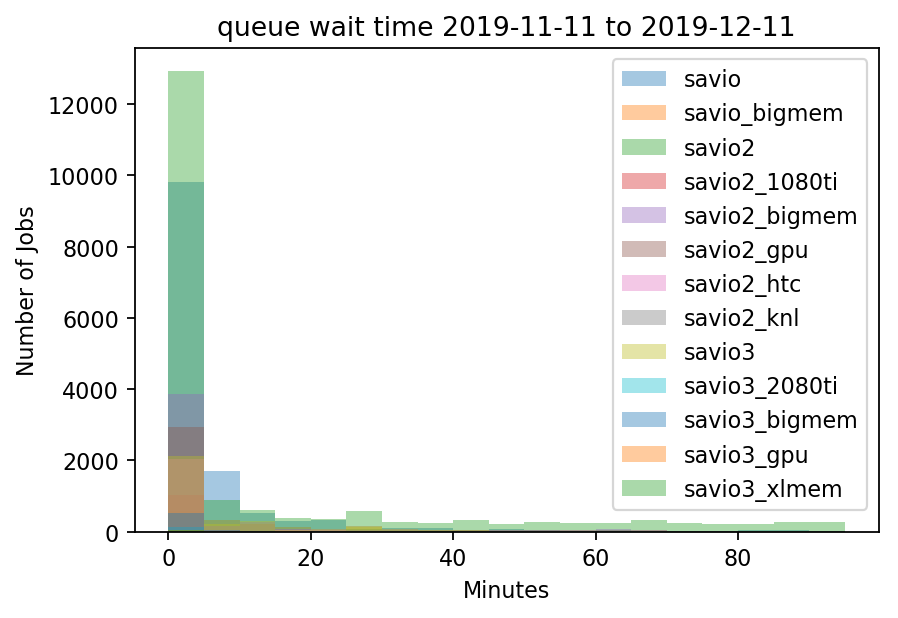

In [45]:
#https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/ 
mpl.rcParams['figure.dpi'] = 160  # govern how big the figure is.  def maybe ~75

df0 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')
#df.head()
x1 = df0.loc[df0.cut=='Ideal', 'depth']
x2 = df0.loc[df0.cut=='Fair', 'depth']
x3 = df0.loc[df0.cut=='Good', 'depth']

#PRT="savio2_knl"
#x1 = df[ df['Partition'] == PRT ]['Wait_min']
#x1 = df.loc[ df.Partition == PRT, 'Wait_min']

i=0
x=[]
#for PRT in ['savio2_knl', 'savio2_htc', 'savio3'] :
for PRT in ["savio","savio_bigmem","savio2","savio2_1080ti","savio2_bigmem","savio2_gpu","savio2_htc","savio2_knl","savio3","savio3_2080ti","savio3_bigmem","savio3_gpu","savio3_xlmem"] :
    x.append([])
    x[i]=df[ df['Partition'] == PRT ]['Wait_min']
    plt.hist(x[i], **kwargs, label=PRT)
    i+=1
    

#kwargs = dict(alpha=0.5, bins=100)
kwargs = dict(alpha=0.4, bins=[5 * x for x in range(20)])

#plt.hist(x1, **kwargs, color='g', label='Ideal')
#plt.hist(x1, **kwargs, label='Ideal')
#plt.hist(x2, **kwargs, label='Fair')
#plt.hist(x3, **kwargs, label='Good')
#plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
plt.gca().set(title='queue wait time 2019-11-11 to 2019-12-11', ylabel='Number of Jobs', xlabel="Minutes")
#plt.xlim(50,75)
plt.legend();

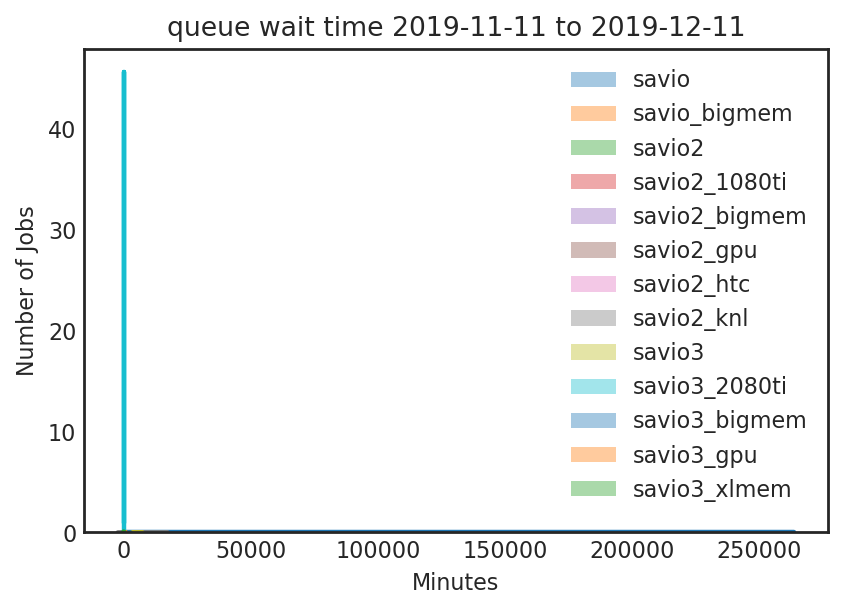

In [49]:
#https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/

# seaborn style... can't do the binning correctly, no good 

import seaborn as sns
sns.set_style("white")

mpl.rcParams['figure.dpi'] = 160  # govern how big the figure is.  def maybe ~75

df0 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')
#df.head()
x1 = df0.loc[df0.cut=='Ideal', 'depth']
x2 = df0.loc[df0.cut=='Fair', 'depth']
x3 = df0.loc[df0.cut=='Good', 'depth']

#PRT="savio2_knl"
#x1 = df[ df['Partition'] == PRT ]['Wait_min']
#x1 = df.loc[ df.Partition == PRT, 'Wait_min']

#kwargs = dict(alpha=0.5, bins=100)
#kwargs = dict(alpha=0.4, bins=[5 * x for x in range(20)])
kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2}, bins=[5 * x for x in range(20)])



i=0
x=[]
#for PRT in ['savio2_knl', 'savio2_htc', 'savio3'] :
for PRT in ["savio","savio_bigmem","savio2","savio2_1080ti","savio2_bigmem","savio2_gpu","savio2_htc","savio2_knl","savio3","savio3_2080ti","savio3_bigmem","savio3_gpu","savio3_xlmem"] :
    x.append([])
    x[i]=df[ df['Partition'] == PRT ]['Wait_min']
    #plt.hist(x[i], **kwargs, label=PRT)
    sns.distplot(x[i], label=PRT, **kwargs)
    i+=1
    


#plt.hist(x1, **kwargs, color='g', label='Ideal')
#plt.hist(x1, **kwargs, label='Ideal')
#plt.hist(x2, **kwargs, label='Fair')
#plt.hist(x3, **kwargs, label='Good')
#plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
plt.gca().set(title='queue wait time 2019-11-11 to 2019-12-11', ylabel='Number of Jobs', xlabel="Minutes")
#plt.xlim(50,75)
plt.legend();

In [166]:
# https://matplotlib.org/3.1.0/gallery/mplot3d/hist3d.html
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

#import matplotlib.pyplot as plt
#import numpy as np

# Fixing random state for reproducibility
#np.random.seed(19680801)

#for PRT in ['savio2_knl', 'savio2_htc', 'savio3'] :
    #df[ df['Partition'] == PRT ]['Wait_min'].hist(ax=ax,bins=[5* x for x in range(12)])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.random.rand(2, 100) * 4    # 2 list of 100 rand num ea, ea*4 for scaling.

#print( np.random.rand(3, 2 ) * 4 )

#hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])
#hist, xedges, yedges = np.histogram2d(x, y, bins=[5* x for x in range(12)], range=[[0, 4], [0, 4]])
df[ df['Partition'] == 'savio2_knl' ]['Wait_min'].hist(ax=ax,bins=[5* x for x in range(12)]), xedges, yedges = np.histogram2d(x, y, bins=[5* x for x in range(12)], range=[[0, 12], [0, 12]])


# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

SyntaxError: can't assign to function call (<ipython-input-166-77d2a82e9a1e>, line 23)

In [167]:
import numpy as np
x = np.random.randint(low=0, high=100, size=100)

# Compute frequency and bins
frequency, bins = np.histogram(x, bins=10, range=[0, 100])

# Pretty Print
for b, f in zip(bins[1:], frequency):
    print(round(b, 1), ' '.join(np.repeat('*', f)))

10.0 * * * * * * * * * * * * *
20.0 * * * * * *
30.0 * * * * * *
40.0 * * * * * * * * * * * * *
50.0 * * * * * * * * * * * * *
60.0 * * * * *
70.0 * * * * * * * * *
80.0 * * * * * * * * * * * *
90.0 * * * * * * * * *
100.0 * * * * * * * * * * * * * *


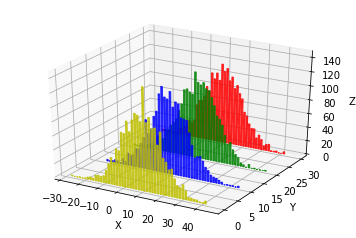

In [120]:
# https://stackoverflow.com/questions/35210337/can-i-plot-several-histograms-in-3d
# this is a bar() graph, which has difference with hist() ... i need a count so need hist()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nbins = 50
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    ys = np.random.normal(loc=10, scale=10, size=2000)

    hist, bins = np.histogram(ys, bins=nbins)
    xs = (bins[:-1] + bins[1:])/2

    ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

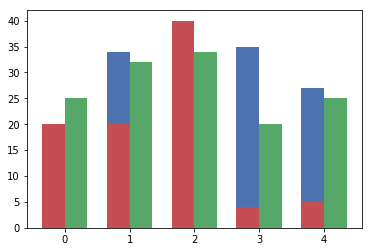

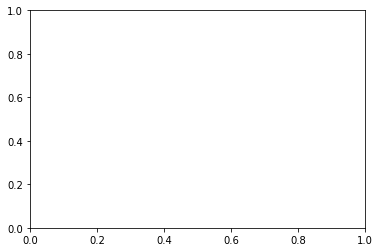

In [119]:
#df.head()
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]            # num of obj has to match labels above
women_means = [25, 32, 34, 20, 25]         

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')



labels = ['savio', 'savio2', 'savio2_knl', 'savio2_htc', 'savio3']

x = np.arange(len(labels))
width = 0.35 # width of bars

ser1_means = [ 20, 20 , 40, 4, 5]
ser2_means = [ 20, 20 , 50]

rects1 = ax.bar(x - width/2, ser1_means, width, label='Men')


#ser1_means = df[ df['Partition'] == PRT ]['Wait_min'].values.tolist()
#ser1_means = [ df[ df['Partition'] == 'savio2_knl' ]['Wait_min'].to_numpy() ]
#list =  pd.DataFrame(df[ df['Partition'] == 'savio2_knl' ]['Wait_min']).values.tolist()  
#print( list )
#$$plt.plot( list )
##print(  pd.DataFrame(df[ df['Partition'] == 'savio2_knl' ]['Wait_min']).to_numpy()  )
ser = (df[ df['Partition'] == 'savio2_knl' ]['Wait_min'])
#print(  ser.to_numpy()  )

rects = []

fig2, ax2 = plt.subplots()
#rects1 = ax2.bar(x - width/2, ser1_means, width, label="ser1")
#rects2 = ax2.bar(x + width/2, ser2_means, width, label="ser2")
#rects1 = ax.bar(x - width/2, ser1_means, width, label=labels[0])


#for PRT in labels :
    #print( "Queue: " + PRT )
    #_, ax = plt.subplots()
    # the dataframe on left of .hist() is the series being plotted.  could have been a param for hist()
    #df[ df['Partition'] == PRT ]['Wait_min'].hist(ax=ax,bins=[5* x for x in range(100)])
    
    #ax.set_title('Queue wait time 2019-11-11 to 2019-12-11')
    #ax.set_title( PRT + ' - queue wait time 2019-11-11 to 2019-12-11' )
    #ax.set_ylabel('Number of jobs')
    #ax.set_xlabel('Minutes')
    #ax.set_xlim([0,100])

No handles with labels found to put in legend.


Queue: savio2_htc


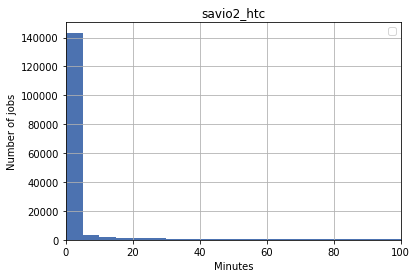

Queue: savio3


AssertionError: passed axis not bound to passed figure

In [70]:

plt.style.use('seaborn-deep')
#_, ax = plt.subplots(3,3)
_, ax = plt.subplots()
#for PRT in ['savio', 'savio2', 'savio2_knl', 'savio2_htc', 'savio3'] :
for PRT in ['savio2_htc', 'savio3' ] :
#for PRT in ['savio2_htc' ] :   
    print( "Queue: " + PRT )
    #df = df[ df['Partition'] == PRT]
    #plt.hist(PRT,bins=[5* x for x in range(100)],label=PRT)
    #df[ df['Partition'] == PRT ]['Wait_min'].hist(ax=ax,bins=[5* x for x in range(100)])
    
    #df[ df['Partition'] == PRT ]['Wait_min'].hist(ax=ax,bins=[5* x for x in range(100)])
    df['Wait_min'].hist(ax=ax,bins=[5* x for x in range(100)])
    #df['Wait_min'].hist(ax=ax,bins=[5* x for x in range(100)],by=df['Partition'])
    #df['Wait_min'].hist(bins=[5* x for x in range(100)],by=df['Partition'])
    #ax.set_title('Queue wait time 2019-11-11 to 2019-12-11')
    plt.legend(loc='upper right')
    """
    """
    ax.set_title( PRT )
    ax.set_ylabel('Number of jobs')
    ax.set_xlabel('Minutes')
    ax.set_xlim([0,100])
    
    plt.show()

In [97]:
hist(ax=ax,bins=[5* x for x in range(100)])
